# 2. Dataset Investigation

In [339]:
import pandas as pd
import numpy as np
#-------------------------
import seaborn as sns #Seaborn is a library for making statistical graphics in Python.
import matplotlib.pyplot as plt 
import pylab as pl

#-------------------------
%matplotlib inline

### 2.1. Loading Data

In [340]:
df = pd.read_csv('/Users/sf.alqahtani/Desktop/Evaluation1/BlackFriday.csv')

In [341]:
print(df.shape) #(row, columns)

(537577, 12)


In [342]:
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


### 2.2. Data exploration

#### 2.2.2 Setting the research goals


We have 12 columns and 537577 rows with a lot of data about blackFriday store, now we should specify the goals of doing this analysis:
I think I will help the "blackFriday store" by telling them about 'most common' in each column to take advantage and target more customers :

-"Product_ID " find which product is the most common.
-"Gender" find which gender is the most common: Males of Females?.
-"Age" find the frequency range. 
-"Marital_Status" find the common status: married or not.
-"Occupation" find the common Occupation id.
-I think there is something important in "Stay_In_Current_City_Years" will help us I can't specify it now.
-From the three product categories, we can figure out which type has the most purchases. 
-In my opinion, there are two useless columns: User_ID and Product_ID. 


The target variable is Purchase the rest is the Predictors 

#### We have some "NaN's" values in the product categories: Product_Category_2 and Product_Category_3 
Now we need to use "describe()" function to represent some statistics to understand data clearly.

In [343]:
df.describe().T.applymap("{0:.2f}".format)

,count,mean,std,min,25%,50%,75%,max
User_ID,537577.00,1002991.85,1714.39,1000001.00,1001495.00,1003031.00,1004417.00,1006040.00
Occupation,537577.00,8.08,6.52,0.00,2.00,7.00,14.00,20.00
Marital_Status,537577.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
Product_Category_1,537577.00,5.30,3.75,1.00,1.00,5.00,8.00,18.00
Product_Category_2,370591.00,9.84,5.09,2.00,5.00,9.00,15.00,18.00
Product_Category_3,164278.00,12.67,4.12,3.00,9.00,14.00,16.00,18.00
Purchase,537577.00,9333.86,4981.02,185.00,5866.00,8062.00,12073.00,23961.00


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [345]:
#Gender
M= df.Gender.str.count("M").sum()
F= df.Gender.str.count("F").sum()
print("The Sum of Females are", F)
print("The Sum of Males are", M)

The Sum of Females are 132197
The Sum of Males are 405380


In [346]:
#Age
#Age values are strings,I needd to convert it with an integer value(???HOW TO)

In [352]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [348]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [349]:
df.describe(include = ['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


Conclusions:

1- There are missing values in "Product_Category_2" and "Product_Category_3" both are from the same kind.
2- The rest of the columns are valid there are no missing values.

3- About Columns:

   4.1- Gender: 405380 for Males, so the most common customer is Males.
   4.2- Age: The most Common is in the range from 26 to 35
   4.3- Marital_Status: 75% is married.
   4.4- Max of Product_Category_2 and Product_Category_3 is '18'
   4.5- Purchase: maybe there are outliers (between min:185 and max:23961 ) I will check it by boxplot.
   4.6-Stay_In_Current_City_Years: there are 5 categories the top stands for category 1 which mean (Stay 1 year)
   
4- Categorical : Product_ID,Gender,age,City_Category and Stay_In_Current_City_Years.
The rest is Numerical. 

5- Datatypes in their data are:
integer
float
String
We will focus on object datatypes.

In [173]:
#df['Product_Category_2'] # to check 

In [175]:
#data[data['User_ID'] == 1000001]

### 2.3. Data Cleansing
To try plot on columns, I will clean the NaN values by fill it with zeros I Think it would be safe.

In [350]:
u2 = df['Product_Category_2'].unique() 
u3 = df['Product_Category_3'].unique() 

#unique function to return unique values of Series object.

print('Product_Category_2', u2)
print('Product_Category_3', u3)

#df = df.fillna(value=0, inplace=True) #fillna function to Replace all NaN elements.

Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3 [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


#### 2.3.1 Handling missing values.
 

In [351]:
df = df.fillna(0)
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,0.0,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,0.0,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,0.0,0.0,7871


#### 2.3.2 Dropping unneeded cols
 

In [244]:
#There is useless columns "Product_ID" and "User_ID" I will drop it :

useless = ['User_ID','Product_ID']

df.drop(useless, inplace = True, axis =1) #drop function to drop specified labels from rows or columns.

#### 2.3.3 Dealing with object datatypes

Let's mapping

In [242]:
age = np.unique(df['Age'])
age

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

We have six bins let's make it into numeric values.

In [264]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
df['Age'] = df['Age'].apply(map_age)

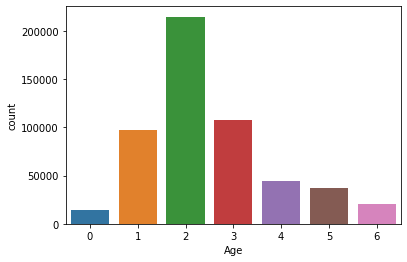

In [196]:
#let's see it
sns.countplot(df['Age'])
plt.show()

In [353]:
city = np.unique(df['City_Category'])
city

array(['A', 'B', 'C'], dtype=object)

In [281]:
def map_city_categories(City_Category):
    
    if City_Category == 'A':
        return 2
    elif City_Category == 'B':
        return 1
    elif City_Category =='C':
        return 0
    else:
        return -1
df['City_Category'] = df['City_Category'].apply(map_city_categories)

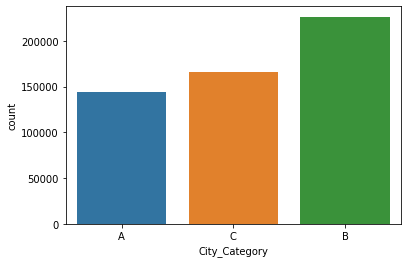

In [356]:
#let's see it
sns.countplot(df['City_Category'])
plt.show()

In [285]:
df.head(12)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,6,10,-1,2,0,3,0.0,0.0,8370
1,F,6,10,-1,2,0,1,6.0,14.0,15200
2,F,6,10,-1,2,0,12,0.0,0.0,1422
3,F,6,10,-1,2,0,12,14.0,0.0,1057
4,M,6,16,-1,4+,0,8,0.0,0.0,7969
5,M,6,15,-1,3,0,1,2.0,0.0,15227
6,M,6,7,-1,2,1,1,8.0,17.0,19215
7,M,6,7,-1,2,1,1,15.0,0.0,15854
8,M,6,7,-1,2,1,1,16.0,0.0,15686
9,M,6,20,-1,1,1,8,0.0,0.0,7871


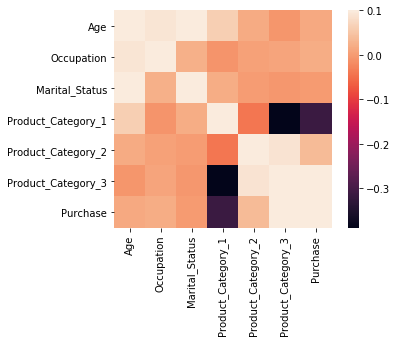

In [247]:
HeatMap = df.corr()

sns.heatmap(HeatMap, vmax=.1, square=True) 

plt.show() #To remove unnecessary details

Conclusions:

'Product_Category_1' with 'Purchase' = negative correlation .
'Product_Category_3' with 'Purchase' =  strong correlation . 
'Maritial_Status' and 'Age' = strong correlation.


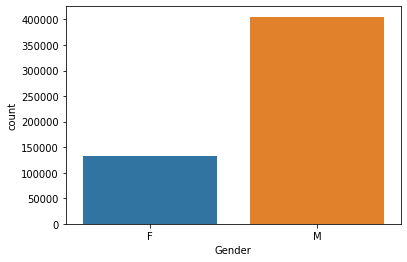

In [260]:
sns.countplot(df['Gender'])
plt.show() #To remove unnecessary details

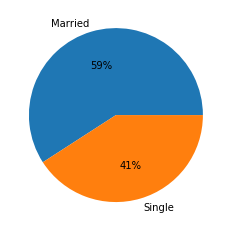

In [248]:
plt.pie(df["Marital_Status"].value_counts().values, 
        labels=["Married","Single"], autopct="%1.0f%%") #for percentages
#----------------------------------------
plt.show() #To remove unnecessary details

In [ ]:
M= df.Marital_Status.count("1").sum()
Sen= df.Marital_Status.count("0").sum()
print("The Sum of Females is", F)
print("The Number of Males is", M)

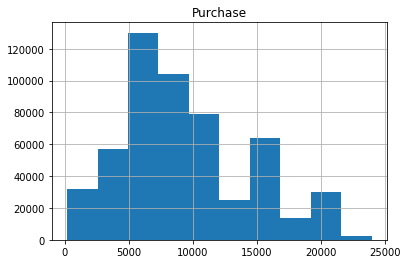

In [288]:
df.hist(column = 'Purchase')
plt.show()

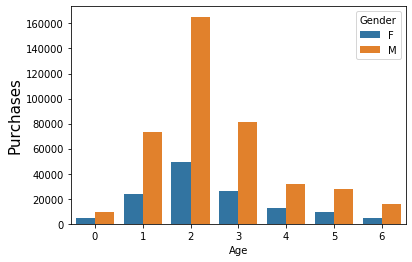

Males make the most purchases in all of age ranges.
The highest purchases for both genders are in range 26-35 


In [188]:
d1 = df.loc[:,("Age","Gender")]
d1 = d1.groupby(["Age", "Gender"]).size().reset_index(name="Count")

#----------------------------------------

sns.barplot(x="Age", y="Count", hue="Gender", data = d1)
plt.ylabel("Purchases", fontsize = 15)

#----------------------------------------
plt.show()
print("Males make the most purchases in all of age ranges.")
print("The highest purchases for both genders are in range 26-35 ")

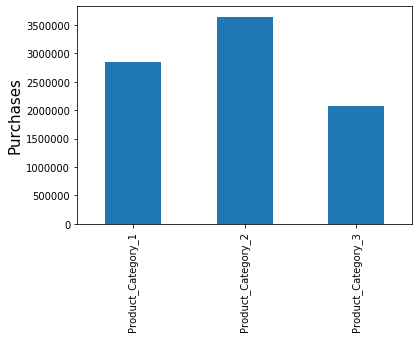

So,'Product category 2' has the most purchases so we will suggest to increase it!.


In [354]:
products = df.loc[:,("Product_Category_1","Product_Category_2","Product_Category_3")]
labels = ["Product Category 1", "Product Category 2", "Product Category 3"]
#----------------------------------------
products.sum().plot(kind="bar")
plt.ylabel("Purchases", fontsize = 15)
#----------------------------------------
plt.show()

print("So,'Product category 2' has the most purchases so we will suggest to increase it!.")

#How can I colored each Category?

Summary :
 1- The most money spent on Black Friday comes from unmarried males.
 2- The age range is 26-35.
 3- 'Product category 2' has the most purchases.

In [301]:
mean1 = df['Product_Category_1'].mean()
mean2 = df['Product_Category_2'].mean()
mean3= df['Product_Category_3'].mean()
print(f" Product_Category_1: {mean1} \n Product_Category_2: {mean2} \n Product_Category_3 : {mean3}") 

 Product_Category_1: 5.295546498455105 
 Product_Category_2: 6.784907092379324 
 Product_Category_3 : 3.871772787898292


In [302]:
max1 = df['Product_Category_1'].max()
max2 = df['Product_Category_2'].max()
max3= df['Product_Category_3'].max()
print(f" Product_Category_1: {max1} \n Product_Category_2: {max2} \n Product_Category_3 : {max3}")

 Product_Category_1: 18 
 Product_Category_2: 18.0 
 Product_Category_3 : 18.0


In [305]:
min1 = df['Product_Category_1'].min()
min2 = df['Product_Category_2'].min()
min3= df['Product_Category_3'].min()
print(f" Product_Category_1: {min1} \n Product_Category_2: {min2} \n Product_Category_3 : {min3}")

 Product_Category_1: 1 
 Product_Category_2: 0.0 
 Product_Category_3 : 0.0


In [308]:
u1 = df['Product_Category_1'].unique()
u2 = df['Product_Category_2'].unique()
u3= df['Product_Category_3'].unique()
print(f" Product_Category_1: {u1} \n Product_Category_2: {u2} \n Product_Category_3 : {u3}")

 Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9] 
 Product_Category_2: [ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.] 
 Product_Category_3 : [ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


Product_Category_3 is much lesser in price than Product_Category_ 1 & 3. 

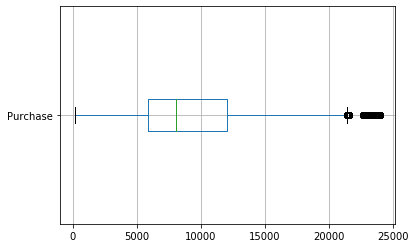

In [190]:
df.boxplot(['Purchase'], vert = False)
plt.show()

In [355]:
df[df['Purchase']== df['Purchase'].max()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
87440,1001474,P00052842,M,26-35,4,A,2,1,10,15.0,0.0,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,15.0,0.0,23961
370891,1003160,P00052842,M,26-35,17,C,3,0,10,15.0,0.0,23961


-I have thought Purchase has an outlier at 23961, but after this, we found data in the same range(almost)
-The three users with max Purchase having the same product id and product category.

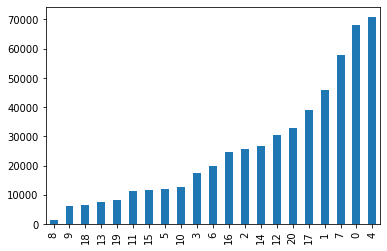

In [205]:
fig, ax = plt.subplots()
df['Occupation'].value_counts().sort_values().plot('bar')
plt.show()

People who are in the(7,0,4) Occupations are participate in BlackFriday more than others.

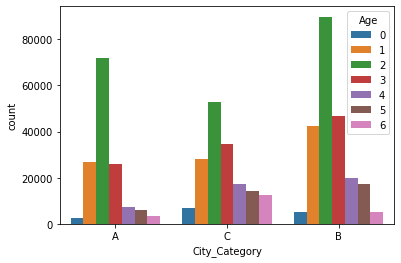

In [211]:
fig, ax = plt.subplots()
sns.countplot(df['City_Category'],hue=df['Age'])
plt.show()

The Common age in each city categories is in 2 (related to the 26-35 range).
The transaction in City_Category B is more than others.

In [198]:
#df[df['Product_Category_2']== df['Product_Category_2'].max()]

Lets see how are final dataframe looks like:

In [194]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0,10,A,2,0,3,0.0,0.0,8370
1,F,0,10,A,2,0,1,6.0,14.0,15200
2,F,0,10,A,2,0,12,0.0,0.0,1422
3,F,0,10,A,2,0,12,14.0,0.0,1057
4,M,6,16,C,4+,0,8,0.0,0.0,7969


Conclusion: 

1-Men go to BlackFriday more than women.
2-People who are in the 26-35 age range participate in BlackFriday more than others. 
3-People who lives in City B bought more than others. 
4-People who are married go to BlackFriday more than Singles. 
5-Max of Product_Category_2 and Product_Category_3 is '18'
6-People who are in 7,0,4 Occupation bought more than others. 

DONE الحمدلله This dataset was enjoyable.
